## A quick Demonstration of Gradient Descent with Linear Regression

The following below is a quick demonstration of gradient descent for **linear regression**. 

<img src='http://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png' />

First we will import our libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate some random numbers to fit a line

In [2]:
# number of points to generate
n_values = 40

# setup some simple values
x_obs = np.array(range(n_values))
y_obs = np.array(range(n_values))
np.random.seed(3)

# we don't want a perfect dataset, so we will add some random noise (2nd term)
y_obs_noise = 5*y_obs + 70*np.random.rand(n_values)

### Plot the random data

In [18]:
# peek at the data
y_obs_noise

array([  38.55585318,   54.57034758,   30.36333172,   50.75793236,
         82.5062868 ,   87.74051623,   38.79097173,   49.50700147,
         43.60270423,   75.85668906,   52.09133476,   86.97832571,
        105.44008333,   84.49410979,  117.33784314,  116.36039722,
         81.67873177,  124.11978616,  108.14767128,  124.05708379,
        119.84675572,  153.51965428,  140.83176024,  125.98074169,
        158.12543126,  179.62203352,  151.44544727,  150.53705188,
        167.15798803,  210.54685549,  218.31967957,  202.06685731,
        223.1983876 ,  224.20256099,  196.45958289,  181.45519062,
        225.73876318,  224.04885337,  215.30953341,  210.75381534])

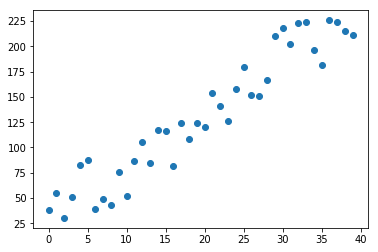

In [19]:
plt.scatter(x_obs, y_obs_noise)

## Linear regression Equations + Theory

<img src="https://pbs.twimg.com/profile_images/955598506118463488/Nw6d0Zt3_400x400.jpg" style="width:250px" />

Our assumed equation:

$$ \hat{y} = ax + b $$

- **y, x** - are observed data points. In this example, these values are fixed
- **a** - unknown slope of the optimal line
- **b** - unknown offset of the optimal line

Instead of solving analytically, we will define a loss function and apply gradient descent. The typical loss function is ** mean squared error (MSE ** the equation is provided below.

$$ MSE = \frac{1}{N} \sum (y - \hat{y})^2 $$
$$ MSE = \frac{1}{N} \sum (y - ax - b)^2 $$

The above equation will only tell us "how far off we are". So for a first step we can assume that 

Initial assumption:
- **a = 1**
- **b = 0**

We can calculate a loss, but how will we know where the next value will be?

We take a derivative of MSE with respect to **a** and with respect to **b**. 

$$ da = \frac{-2}{N} \sum a(y - ax - b) $$
$$ db = \frac{-2}{N} \sum (y - ax - b) $$

Then we can get our new values of **a,b** by moving against the slope. Since we are taking tiny steps we will multiply the step by a small decimal and recalculate. This is the **learning rate**

$$ a_{next} = a - \gamma da $$

$$ b_{next} = b - \gamma db $$

**Goal** we want to do the following:

    ## Psuedo Code!
    1. Initialize a, b to random numbers
    2. predict y_hat from a, b guesses
    3. calculate gradients da, db
    4. update the a, b values to new guesses
    5. go to step 2
    6. Stop when a,b constants don't change much between iterations

### Initialize our values

In [5]:
# start with a guess:
def initialize():
    np.random.seed(3)
    a = np.random.random()
    b = np.random.random()
    return a, b

### Define prediction and loss functions

In [6]:
def predict(x_obs, a,b):
    return a*x_obs + b

def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

### Use the above calculus formulas to calculate the next incremental step 

In [7]:
def gradient(y_obs, y_hat, a,b):
    da = -2*np.mean(y_obs - y_hat)*a
    db = -2*np.mean(y_obs - y_hat)
    return da, db

In [8]:
def plot_preds(x_obs, y_pred, y_obs, i = 0):
    ## added to plot initial graph
    fig = plt.figure()
    ax = fig.gca()
    ax.yaxis.limit_range_for_scale(0,100)
    ax.set_title('iteration i=%d' % i)
    ax.scatter(x_obs, y_pred, c='red', marker='x')
    ax.scatter(x_obs, y_obs)
    

### Let's loop!

Remember here is the psuedo code again:

    ## Psuedo Code!
    1. Initialize a, b to random numbers
    2. predict y_hat from a, b guesses
    3. calculate gradients da, db
    4. update the a, b values to new guesses
    5. go to step 2
    6. Stop when a,b constants don't change much between iterations

In [20]:
def gradient_descent(n_iters, y_obs, x_obs, lr = 0.01, plots_every = 3):

    # STEP 1 :initialize
    a, b = initialize()
    
    # storing values for later plotting
    stored_iter = []
    stored_loss = []
    stored_a_vals = []
    stored_b_vals = []

    for i in range(n_iters):
        
        # STEP 2: Predict
        y_hat = predict(x_obs, a, b)
        
        # STEP 3: calculate gradient
        da, db = gradient(y_obs, y_hat, a,b)
        loss = mse(y_obs, y_hat)    
        
        print 'i=%d, a=%.2f, b=%.2f, da=%.2f, db=%.2f, loss=%.4f,' % (i, a, b, da, db, loss)
        
        #STEP 4: update coefficients a,b
        a -= lr*da
        b -= lr*db
        
        # take a peek - will look at our prediction at some interval
        if i % plots_every == 0:
            plot_preds(x_obs, y_hat, y_obs, i)
            
        # store values for port-mortem analysis
        stored_iter.append(i)
        stored_loss.append(loss)
        stored_a_vals.append(a)
        stored_b_vals.append(b)    
    return a, b, (stored_iter,stored_loss,stored_a_vals,stored_b_vals)

### Run our Loop for 10 iterations

### Run our "training" Loop

<img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" style="width:500px"/>


i=0, a=0.55, b=0.71, da=-131.48, db=-238.71, loss=17417.3711,
i=1, a=1.87, b=3.10, da=-340.77, db=-182.66, loss=10130.6611,
i=2, a=5.27, b=4.92, da=-243.13, db=-46.11, loss=883.2667,
i=3, a=7.70, b=5.38, da=382.42, db=49.64, loss=1833.4749,
i=4, a=3.88, b=4.89, da=-389.98, db=-100.50, loss=3090.7630,
i=5, a=7.78, b=5.89, da=417.01, db=53.60, loss=1987.9037,
i=6, a=3.61, b=5.36, da=-397.48, db=-110.11, loss=3697.8571,
i=7, a=7.58, b=6.46, da=357.35, db=47.11, loss=1692.9642,
i=8, a=4.01, b=5.99, da=-373.83, db=-93.19, loss=2694.8261,
i=9, a=7.75, b=6.92, da=422.07, db=54.46, loss=1990.0547,
i=10, a=3.53, b=6.37, da=-392.53, db=-111.23, loss=3794.5242,
i=11, a=7.45, b=7.49, da=328.57, db=44.08, loss=1541.4055,
i=12, a=4.17, b=7.04, da=-354.10, db=-84.95, loss=2282.9325,
i=13, a=7.71, b=7.89, da=422.87, db=54.85, loss=1973.0807,
i=14, a=3.48, b=7.35, da=-386.94, db=-111.17, loss=3811.9257,
i=15, a=7.35, b=8.46, da=308.45, db=41.96, loss=1433.5606,
i=16, a=4.27, b=8.04, da=-337.71, db=-79.

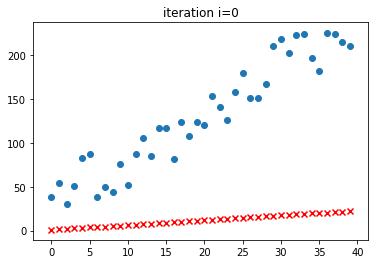

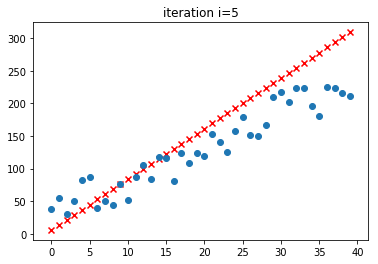

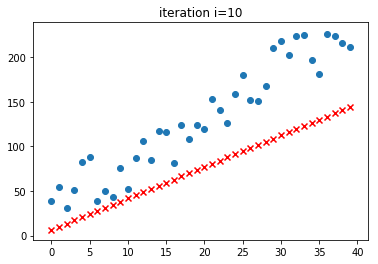

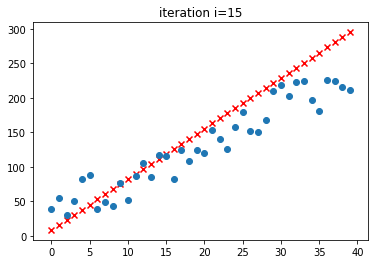

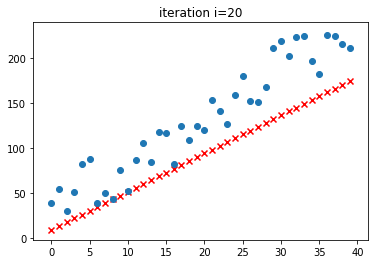

In [21]:
opt_a, opt_b, training_stats = gradient_descent(25, y_obs_noise, x_obs, lr=0.01, plots_every=5)

### Using our optimal a, b, plot the predicted points

In [22]:
y_pred = predict(x_obs, opt_a, opt_b)

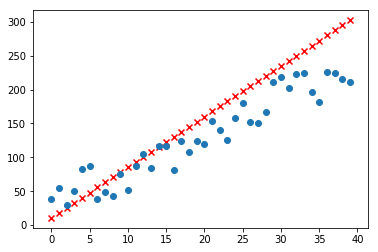

In [23]:
plt.figure()
plt.scatter(x_obs, y_pred, c='red', marker='x')
plt.scatter(x_obs, y_obs_noise)

## Why isn't it finding the exact line? (Learning Rate is too large)

<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA0oAAAAJDUzMTBlMDdjLWM0ZmMtNDJkNS1hODk3LTAzYTllMDUwZmY1OQ.jpg" style='width:400px' />

#### Looking at loss over iterations

Since we have such a high learning rate, we see that there is a cyclical portion after 5 iterations because it can't find the optimal solution

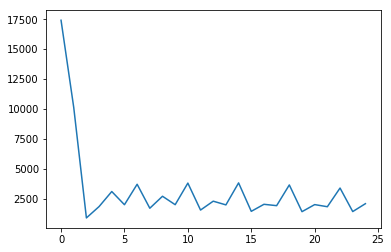

In [24]:
stored_iter,stored_loss,stored_a_vals,stored_b_vals = training_stats
plt.plot(stored_iter, stored_loss)

#### Looking at the Value of A vs. Loss - steps are too large

Similiarly we see that we get stuck bouncing around **a** values after the initial drop

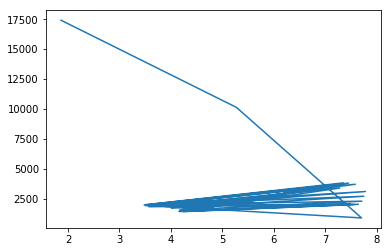

In [25]:
stored_iter,stored_loss,stored_a_vals,stored_b_vals = training_stats
plt.plot(stored_a_vals, stored_loss)

## Let's try again with a lower learning rate

i=0, a=0.55, b=0.71, da=-131.48, db=-238.71, loss=17417.3711,
i=1, a=0.68, b=0.95, da=-159.04, db=-233.10, loss=16597.2788,
i=2, a=0.84, b=1.18, da=-190.50, db=-226.43, loss=15645.0234,
i=3, a=1.03, b=1.41, da=-225.51, db=-218.55, loss=14554.0636,
i=4, a=1.26, b=1.62, da=-263.19, db=-209.32, loss=13325.6609,
i=5, a=1.52, b=1.83, da=-302.03, db=-198.64, loss=11972.1295,
i=6, a=1.82, b=2.03, da=-339.83, db=-186.46, loss=10519.6302,
i=7, a=2.16, b=2.22, da=-373.73, db=-172.83, loss=9009.4328,
i=8, a=2.54, b=2.39, da=-400.49, db=-157.91, loss=7496.4031,
i=9, a=2.94, b=2.55, da=-416.93, db=-141.98, loss=6043.8213,
i=10, a=3.35, b=2.69, da=-420.65, db=-125.43, loss=4714.6941,
i=11, a=3.77, b=2.82, da=-410.55, db=-108.78, loss=3561.3058,
i=12, a=4.18, b=2.93, da=-387.29, db=-92.55, loss=2616.1015,
i=13, a=4.57, b=3.02, da=-353.23, db=-77.26, loss=1887.1005,
i=14, a=4.93, b=3.10, da=-311.91, db=-63.33, loss=1359.4371,
i=15, a=5.24, b=3.16, da=-267.29, db=-51.04, loss=1002.0627,
i=16, a=5.50, b

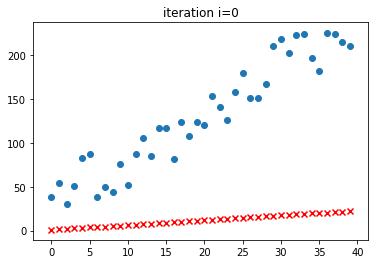

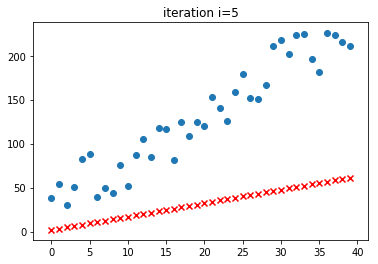

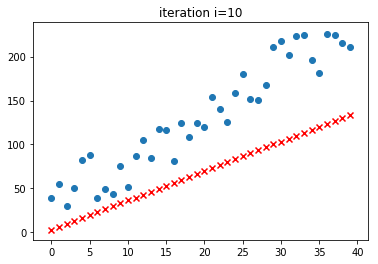

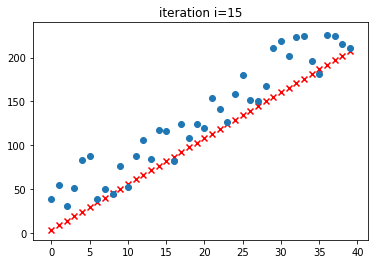

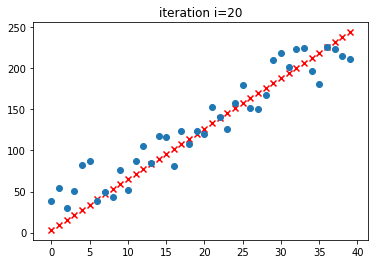

In [26]:
opt_a, opt_b, training_stats = gradient_descent(25, y_obs_noise, x_obs, lr=0.001, plots_every=5)

### Re-examining Loss over iterations

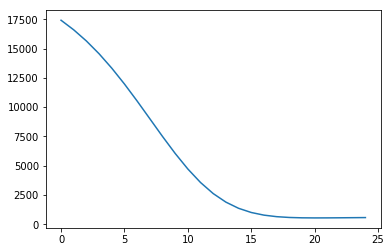

In [27]:
stored_iter,stored_loss,stored_a_vals,stored_b_vals = training_stats
plt.plot(stored_iter, stored_loss)

### Re-examining Optimal `a` value

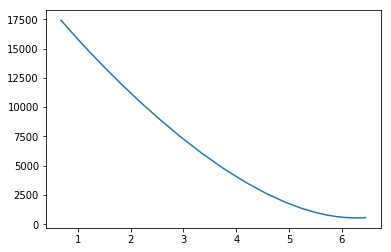

In [28]:
stored_iter,stored_loss,stored_a_vals,stored_b_vals = training_stats
plt.plot(stored_a_vals, stored_loss)